Garbage Bin Classification problem 

 With the following distribution:

- **Blue bin** (recyclable): 2,398 images
- **Green bin** (compostable):      826 images
- **Black bin** (landfill):         844 images 




The dataset can be downloaded here:


- [GDrive](https://drive.google.com/file/d/1-q56xKd4yEsFo5xwz5Rd1Zn_lyCXLaMU/view?usp=sharing)

The data has already been pre-processed for you. Images were resized to 512 x 400 pixels and converted to PNG. Be mindful that a considerable number of samples in the datset set may have been incorrectly labelled. 


The Jupyter Notebook should be divided into two parts: 1. Model development; 
2. Model testing. 




IMPORTING  THE LIBRRARIES

In [ ]:
%matplotlib inline 
import cv2 as cv
import tensorflow as tf
import tensorflow_datasets as tfds # tensorflow datasets - pip install tensorflow-datasets
import numpy as np
import glob
import matplotlib.pyplot as plt
from skimage import transform 

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


Bad key "text.kerning_factor" on line 4 in
C:\Users\yumin\.conda\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 1. Load dataset, explore it  and split it into train, validation and test sets

In [1]:
data_dir = "C:/Users/yumin/Desktop/ENEL 645/assignment 4/Development" #location of the images directory
class_names = ["Blue", "Black",  "Green"] #mentioned that the class names for this problem are Black, Blue, and Green
images = np.asarray(glob.glob(data_dir + "/*/*.png")) #images path
labels = np.asarray([f.split("\\")[-2] for f in images]) # images labels 
print(len(images)) # this will print the total number of images
print(images[:4]) #depicting the first 4 images
print(labels[:4])#mentioning the labels for the first 4 images

NameError: ignored

COMMENT

The total count of images is 3768.

The labels of top 4 images is Black, Black, Black, and Black.

RE-SIZING THE IMAGES

In [ ]:
# Representing class names as integers, Y is an array 
Y = np.zeros(len(labels))
for ii in range(len(class_names)):
    Y[labels == class_names[ii]] =  ii

In [ ]:
#Because some pictures are RGBA, we will resize the images
img_height = 512 #fixing the size of the image height
img_width = 400 #fixing the size of the image width
X = np.zeros((len(images),img_height,img_width,3)) #X is n array
for (ii,img) in enumerate(images):
    X[ii] = transform.resize(plt.imread(img),(img_height,img_width,3)) #resizing all the images for the sized that we just selected 
    print(ii)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707


COMMENT

All the images have a height of 512 and a width of 400.

DISPLAY SOME OF THE IMAGES

sample_indexes:  (30,)


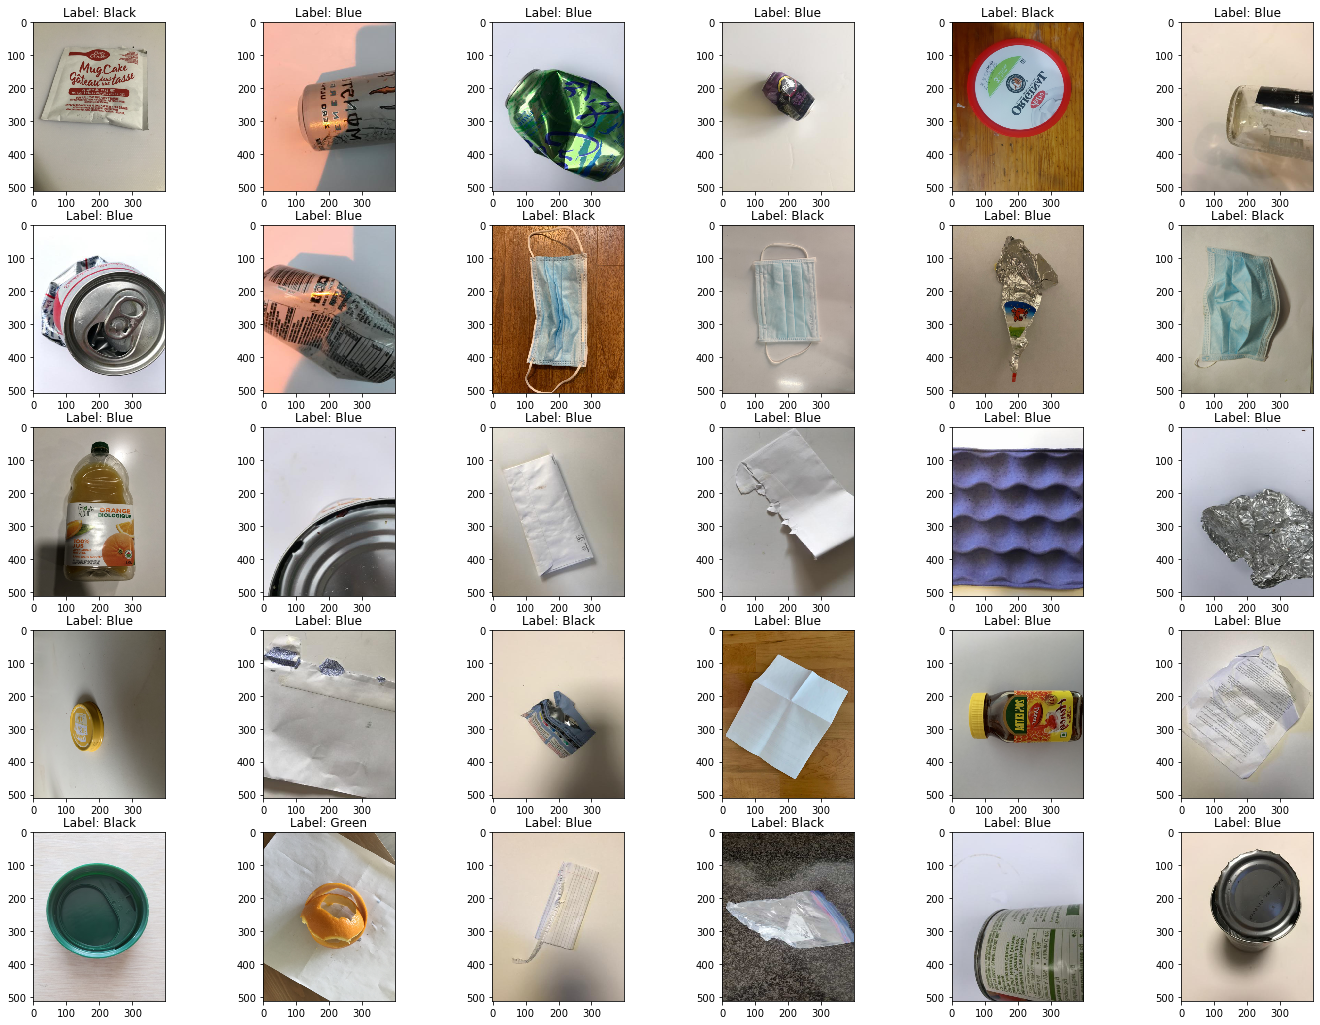

In [ ]:
# Displaying some samples from the development set
sample_indexes = np.random.choice(np.arange(images.shape[0], dtype=int), size=30, replace=False) #displaying a total of 30 images
print("sample_indexes: ", sample_indexes.shape)
plt.figure(figsize=(24, 18)) #fixing the figure size
for (ii, jj) in enumerate(sample_indexes):
    plt.subplot(5, 6, ii + 1) #5 rows and 6 images in each row
    plt.imshow(X[jj], cmap="gray")
    plt.title("Label: %s" % class_names[int(Y[jj])]) #displaying the label along with the images
plt.show()

COMMENT

The dataset seems to be made up of random images. 30 images at random are displayed above

SHUFFLING THE IMAGES

In [ ]:
#The number of classes across samples looks balanced
# shuffle the samples and split them
indexes = np.arange(images.shape[0], dtype = int) # indexes variable being created for selecting the 
np.random.shuffle(indexes) #shuffling the images based on index sizes
X = X[indexes] 
Y = Y[indexes]
# Train/validation/test split
nsplit1 = int(0.8*X.shape[0]) #80% of images
nsplit2 = int(0.9*X.shape[0]) #90% of images
# Train and validation split
X_train = X[:nsplit1] #total of 80% images
Y_train = Y[:nsplit1] #total of 80% images
X_val= X[nsplit1:nsplit2]  #total of 10% images
Y_val = Y[nsplit1:nsplit2] #total of 10%images
X_test = X[nsplit2:] #remaining 10 %images
Y_test = Y[nsplit2:] #remaining 10 %images


print("\nTrain set")
print("Images: ",X_train.shape)
print("Labels shape: ",Y_train.shape)
print("\nValidation set")
print("Images: ",X_val.shape)
print("Labels shape: ",Y_val.shape)
print("Images: ",X_test.shape)
print("Labels shape: ",Y_test.shape)


Train set
Images:  (3014, 512, 400, 3)
Labels shape:  (3014,)

Validation set
Images:  (377, 512, 400, 3)
Labels shape:  (377,)
Images:  (377, 512, 400, 3)
Labels shape:  (377,)


So the total images count in training dataset is 3014. The height of the image is 512 and the width of the images is 400. The number of classes is 3.

The validation and test data have 377 images, approximately 10 % of the original images count of 3767. The height of the images is 512 and the width of the images is 400. The number of classes is 3.

All the images have been shuffled. 

## 2 Data Scaling

In [ ]:
train_mean, train_std = X_train.mean(), X_train.std()
X_train = (X_train - train_mean)/train_std
X_val = (X_val - train_mean)/train_std
X_test = (X_test - train_mean)/train_std


## 3. One hot encoding

In [ ]:
Y_train_oh = tf.keras.utils.to_categorical(Y_train) #converting training labels to categorical values using one hot encoding
Y_val_oh = tf.keras.utils.to_categorical(Y_val) #converting validation labels to categorical values using one hot encoding
Y_test_oh = tf.keras.utils.to_categorical(Y_test) #converting testing labels to categorical values using one hot encoding

print("Labels:")
print(Y_train[:5])
print()
print("One hot encoded labels:")
print(Y_train_oh[:5])

Labels:
[1. 0. 0. 0. 1.]

One hot encoded labels:
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


COMMENT

Looking at the first 5 training labels, looks like they are have been one-hot encoded correctly

## 4. Define your callbacks (save your model, patience, etc.)

In [ ]:
#callback 1 - early stopping
model_name = 'vgg_trush_inceptionV3_final.h5'
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20) 

# if for 20 epochs, the val_loss does not improve the training is going to be interuppted
#Patience is how long the model is going to train without interupting

#callback 2 - monitoring
monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# In this callback you monitor will save the best model and the weights
# This callback is going to keep on checking the validation error and see if the validation error is decreasing, if not then it will save the last model as the best model
# Mode can be used in this function, it is for whether u want to save the minimum or maximum value of the cost function, we are not defining mode as it is automatically defined defined by tensorflow

# callback -3 - Learning rate schedule
def scheduler(epoch, lr):
    if epoch%4 == 0 and epoch!= 0:
        lr = lr/2  #after 10 epoch reduce the learning rate by a factor of 2 
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

COMMENT

I add three callbacks to better so that the model could easily be computed.

## 5. Keras Data Augmentation

In [ ]:
batch_size = 32 #fixing the batch size
gen_params = {"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":10,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
               "cval": 0} 
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)



In [ ]:
# train_gen.fit(X_train,seed = 1) #fixing the same seed for validation and training dataset
# val_gen.fit(X_val, seed = 1)

train_flow = train_gen.flow(X_train,Y_train_oh,batch_size = batch_size)
val_flow = val_gen.flow(X_val,Y_val_oh,batch_size = batch_size)

COMMENT:

A batch size of 32 is selected. A seed is fixed for training and validation dataset. Augmentation is performed for both training and validation datasets.

DISPLAYING IAMGES FROM THE DEVELOPMENTAL DATASET

0.07186294 1.1025176
-2.5593843 1.7259456


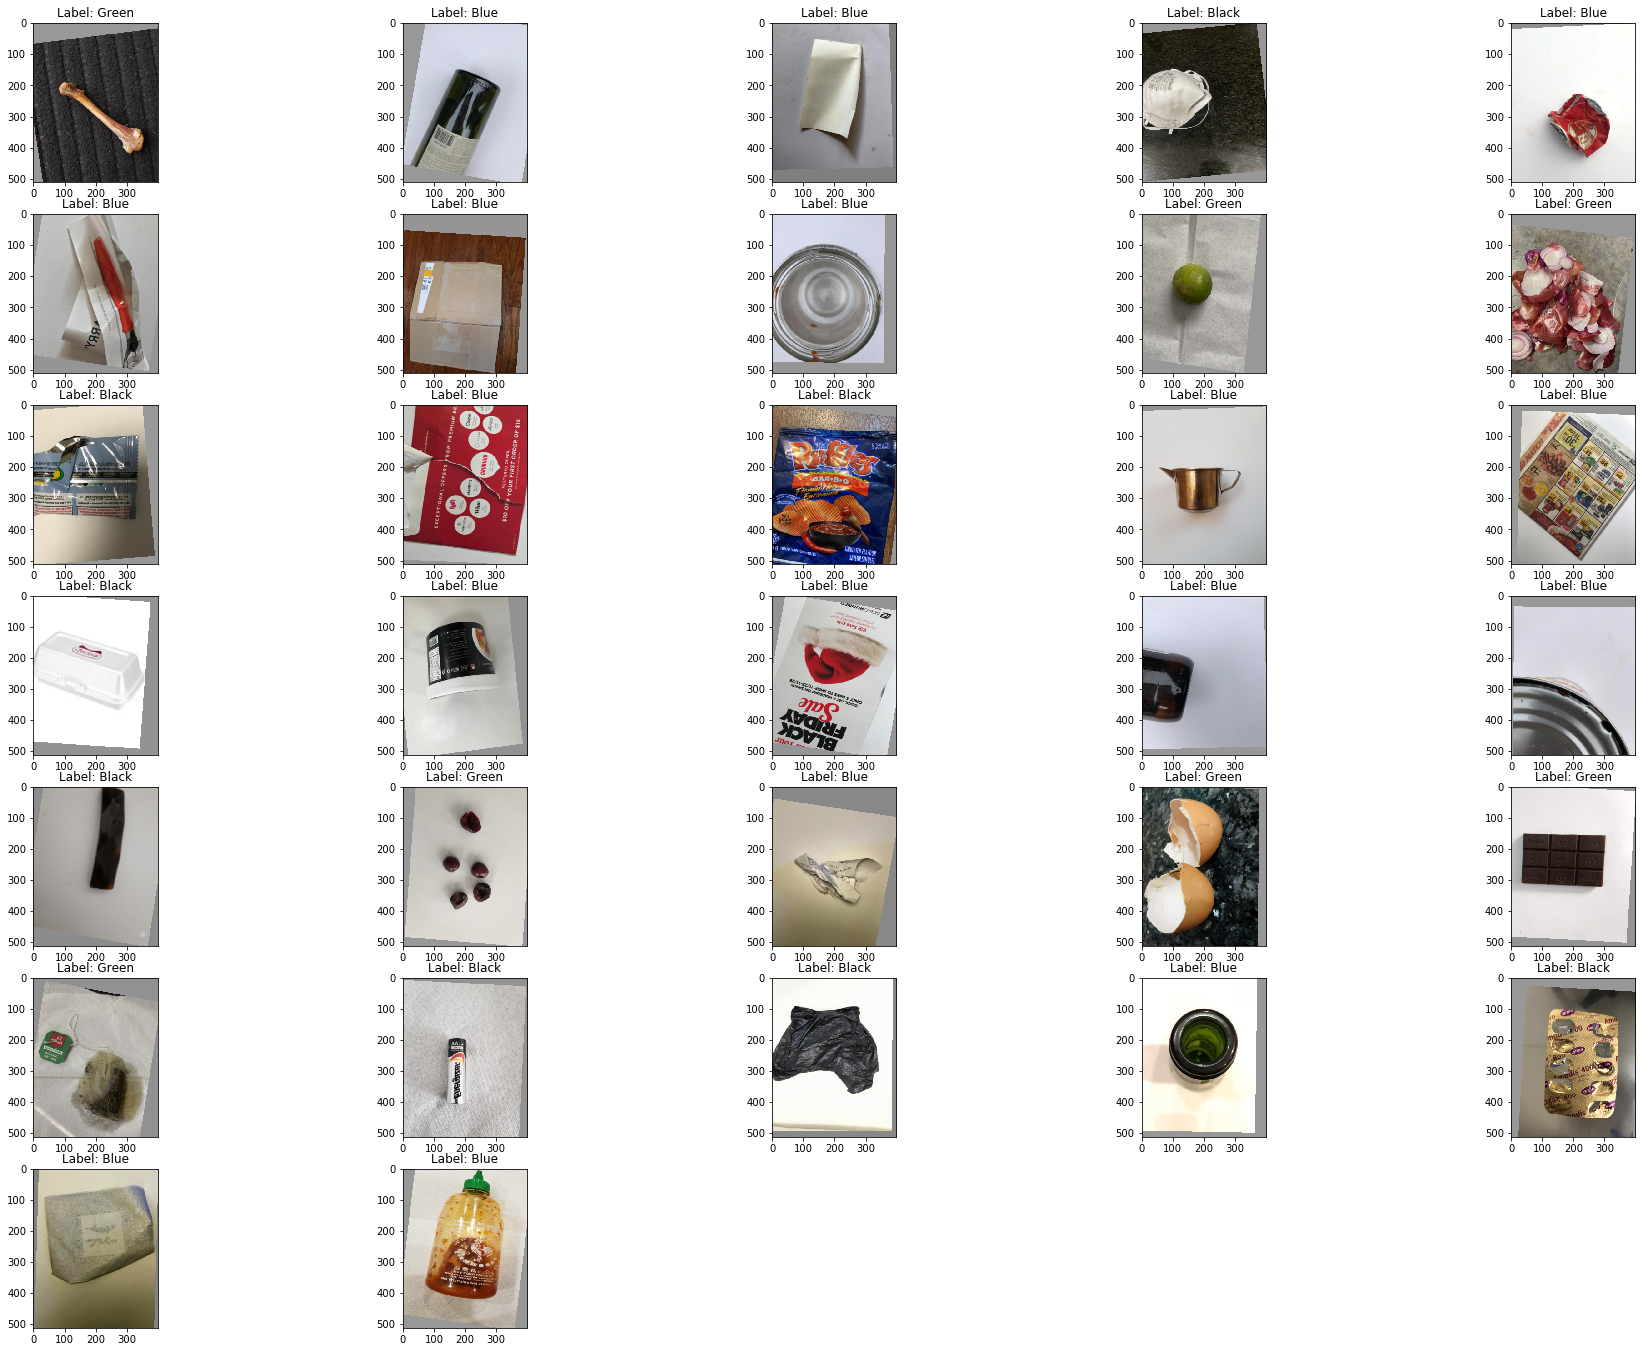

In [ ]:
# Displaying some samples from the development set
plt.figure(figsize = (32,24))
Xbatch,Ybatch = train_flow.__getitem__(0)
print(Xbatch.mean(),Xbatch.std())
print(Xbatch.min(),Xbatch.max())
for ii in range(batch_size):
    plt.subplot(7,5,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    plt.title("Label: %s" %class_names[int(Ybatch[ii].argmax())])
plt.show()

Here we see some of the images at random of the developmental dataset.

## 6. Transfer Learning

In [ ]:
#Freeze the layers (i.e., make them non-trainable) of your pretrained model
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(img_height, img_width, 3),
    include_top=False) 
base_model.trainable = False

We have selected the inception V3 as the transfer learning model with imagenet weights

In [ ]:
from keras import regularizers #used l2 regualization to avoid overfitting
input_image = tf.keras.Input(shape=(img_height, img_width, 3))
x1 = base_model(input_image, training=False)
x2 = tf.keras.layers.Flatten()(x1)
x1_drop = tf.keras.layers.Dropout(0.6)(x2) 
x3 = tf.keras.layers.Dense(256,activation = 'relu')(x1_drop)
x2_drop = tf.keras.layers.Dropout(0.4)(x3)
x3 = tf.keras.layers.Dense(128,activation = 'relu')(x2_drop)
x3_drop = tf.keras.layers.Dropout(0.2)(x3)
out = tf.keras.layers.Dense(len(class_names),activation = 'softmax')(x3_drop)
model = tf.keras.Model(inputs = input_image, outputs =out)
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 512, 400, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 14, 11, 2048)      21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 315392)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 315392)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               80740608  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              


COMMENT

There seem to be 21 million parameters non-trainable paramters and 80 million trainable parameters

Softmax is used as the activation for the last layer as it is a muticlass classifictaion problem. Relu is used as the activation for all the middle layers to avoid carry over of the negative values.


COMPILING AND FITTING THE MODEL

In [ ]:
model.compile(optimizer='adadelta',
              loss='hinge_loss',
              metrics=['accuracy'])
# hist = model.fit_generator(callbacks= [monitor, lr_schedule],steps_per_epoch=15,generator=train_flow, validation_data= val_flow, epochs=300,verbose = 1)
hist=model.fit(train_flow,epochs = 40, \
          verbose = 1, callbacks= [monitor, lr_schedule],validation_data=(val_flow),batch_size = 32)

Epoch 1/40
95/95 [==============================] - 160s 2s/step - loss: 0.8664 - accuracy: 0.6400 - val_loss: 0.5726 - val_accuracy: 0.8037
Epoch 2/40
95/95 [==============================] - 139s 1s/step - loss: 0.6069 - accuracy: 0.7532 - val_loss: 0.5311 - val_accuracy: 0.8011
Epoch 3/40
95/95 [==============================] - 135s 1s/step - loss: 0.5135 - accuracy: 0.7950 - val_loss: 0.4434 - val_accuracy: 0.8355
Epoch 4/40
95/95 [==============================] - 139s 1s/step - loss: 0.4741 - accuracy: 0.8099 - val_loss: 0.4565 - val_accuracy: 0.8249
Epoch 5/40
95/95 [==============================] - 133s 1s/step - loss: 0.4423 - accuracy: 0.8225 - val_loss: 0.4912 - val_accuracy: 0.8170
Epoch 6/40
95/95 [==============================] - 130s 1s/step - loss: 0.4243 - accuracy: 0.8334 - val_loss: 0.5111 - val_accuracy: 0.8090
Epoch 7/40
95/95 [==============================] - 131s 1s/step - loss: 0.4224 - accuracy: 0.8351 - val_loss: 0.4558 - val_accuracy: 0.8143
Epoch 8/40
95

COMMENT

The accuray of the validation dataset improved with the number of iterations. 

We dont see any issue with overfitting.

The training accuracy is 84.9% and the validation accuracy is 84%

Adadelta is used as the optimizer.

Here I have used categorical_crossentropy loss as the loss and accuracy as the metric



In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


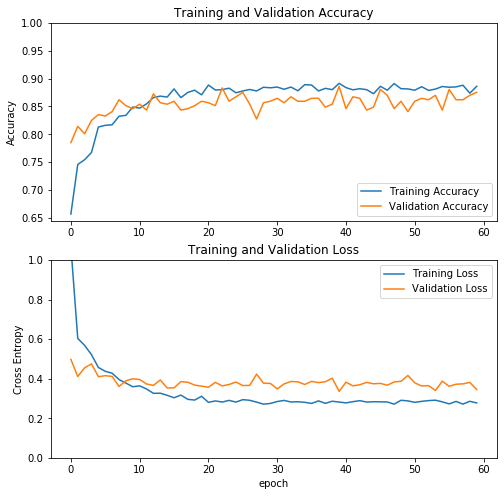

In [ ]:

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8)) #fig size
plt.subplot(2, 1, 1) #subplot-1
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2) #subplot-2
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

We dont see any issue with overfitting and the accuracy and the loss metric of the both training and validation datasets are improving with time.

## 2. Model Testing

In [ ]:
# You are free to adapt this portion of the code, but you should 
# compute the test accuracy and show the images that 
# were classified incorrectly
model.load_weights(model_name)
metrics = model.evaluate(X_test,Y_test_oh)

12/12 [==============================] - 5s 442ms/step - loss: 0.4073 - accuracy: 0.8621


The test accuracy is 86% and the loss is 0.4.

WRONGLY CLASSIFIED IMAGES

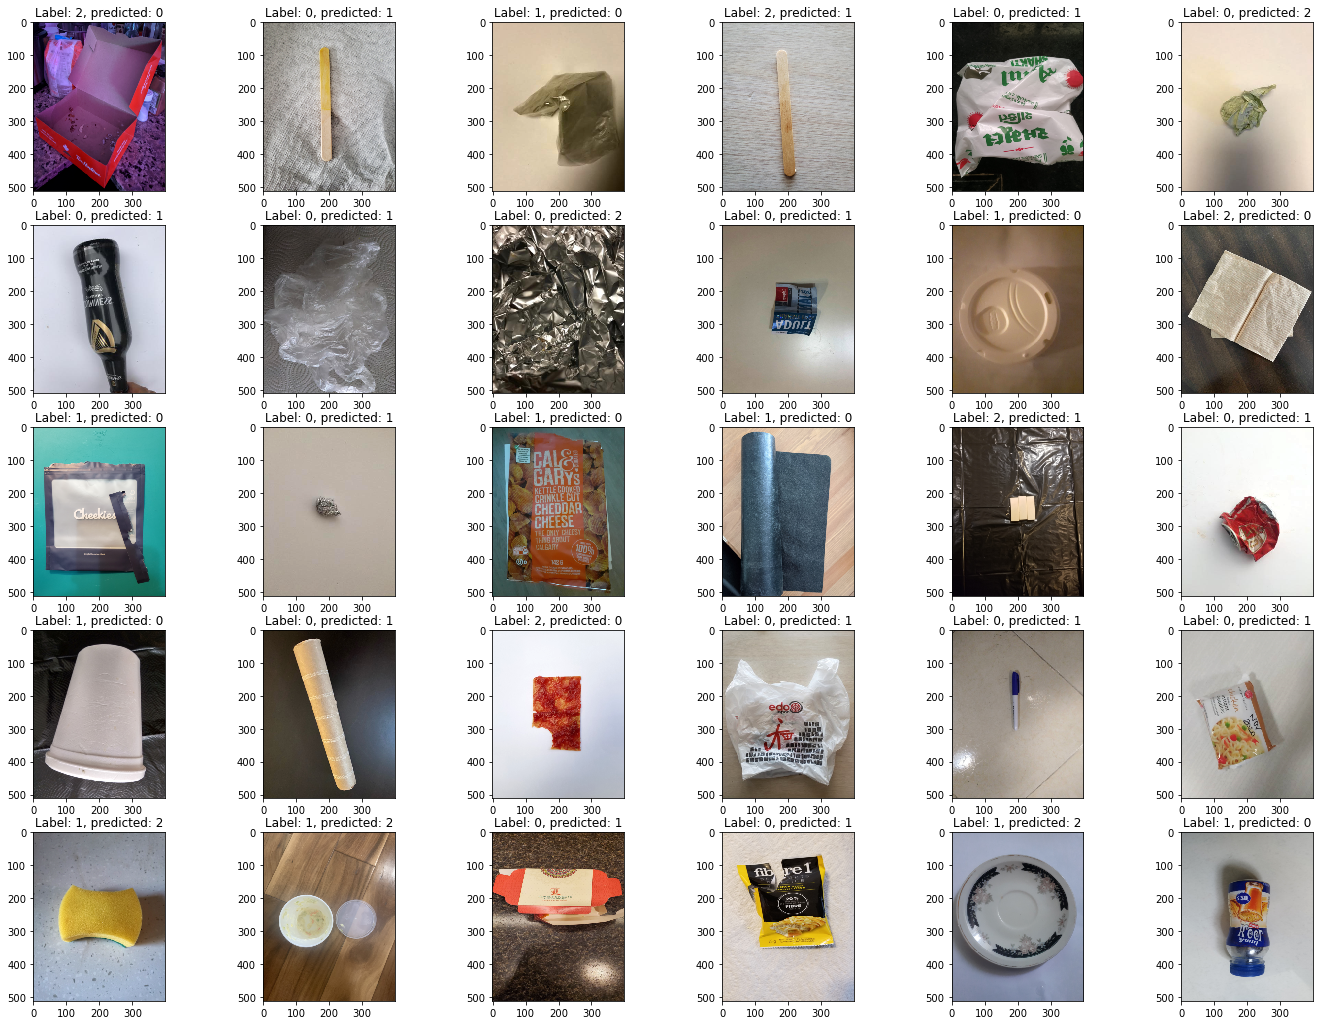

In [ ]:

Ypred = model.predict(X_test).argmax(axis = 1)
wrong_indexes = np.where(Ypred != Y_test)[0]

# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 30, replace = False)
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    aux = X_test[wrong_indexes[jj]]
    aux = (aux - aux.min())/(aux.max() - aux.min())
    plt.imshow(aux, cmap = "gray")
    plt.title("Label: %d, predicted: %d" %(Y_test[wrong_indexes[jj]],Ypred[wrong_indexes[jj]]))
plt.show()

Upon testing the model we notice that the accuracy is 86%and the loss is 0.4.Above we see the images that have been wrongly classified.